In [24]:
import os
import gensim
from gensim import utils
from tqdm.notebook import tqdm
from sklearn.neighbors import kneighbors_graph
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class Dataloader:
    def __iter__(self):
        for genre in tqdm(['ballads', 'elegies', 'songs', 'novels'], leave=True):
            for file in tqdm(os.listdir('../datasets/lemmatized/' + genre), leave=False):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    yield utils.simple_preprocess(f.read())
sentences = Dataloader()

In [64]:
word2vec = gensim.models.Word2Vec(sentences=sentences, vector_size=128, min_count=1)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

In [8]:
#word2vec.save('word2vec_model')
word2vec = gensim.models.Word2Vec.load('word2vec_model')

In [65]:
word2vec.wv.most_similar(positive='царь', topn=10)

[('король', 0.8234285712242126),
 ('царевич', 0.8210429549217224),
 ('патриарх', 0.809118390083313),
 ('престол', 0.785528302192688),
 ('государь', 0.7742128372192383),
 ('император', 0.7716832756996155),
 ('иоанн', 0.7698150873184204),
 ('владыка', 0.7592839002609253),
 ('православный', 0.7545825839042664),
 ('годунов', 0.7450434565544128)]

In [48]:
graphs = []
for sentence in sentences:
    if not sentence:
        continue
    adj = kneighbors_graph(word2vec.wv[sentence], n_neighbors=5, metric='minkowski', p=2)
    graph = nx.from_scipy_sparse_array(adj)
    mapping = {i: token for i, token in enumerate(sentence)}
    graph = nx.relabel_nodes(graph, mapping)
    graph.remove_edges_from(nx.selfloop_edges(graph))
    graphs.append(graph)
    break

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

(-0.05, 0.05)

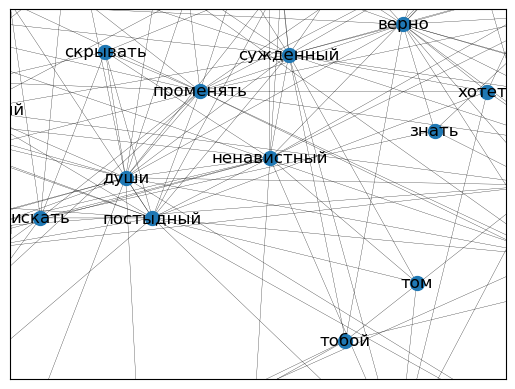

In [62]:
nx.draw_networkx(graphs[0], node_size=100, width=0.2)
plt.xlim(-0.07, 0.03)
plt.ylim(-0.05, 0.05)